

Continuiamo a vedere come utilizzare i dati Yahoo Finance  attraverso la libreria  'yfinance':

nella prima parte [Yahoo Finance Data Download - Parte 1](https://github.com/GMISSAGLIA/GM_PyLab/blob/Main/Yahoo_Finance_Data_Download_1.ipynb) abbiamo visto come lavorare su singoli ticker, in questa seconda parte vedremo come lavorare su più ticker  effettuando download massivi.

A tale fine useremo delle liste di tickers raggruppati per tipologia contenute nei fogli di un file excel; le liste possono essere modificate a  piacimento a seconda delle esigenze  e degli obiettivi di analisi (alcuni ticker potrebbero risultare "scaduti" e non più disponibili, ma ciò non inficia il funzionamento del programma: semplicemente non ne viene effettuato il download)

I principali riferimenti sono quelli già riportati nel prima parte, quindi:

il sito del data provider, cioè  Yahoo, dove potete andare a scegliere e i ticker che si intende scaricare:

  *   [yahoo finance](https://finance.yahoo.com/world-indices)

quindi il link della libreria che andremo ad  utilizzate:
  
1.  [Yahoo Finance Python Library: yfinance -](https://pypi.org/project/yfinance/)

Il presente notebook puo essere eseguito in Google Colab o in locale installando la libreria yfinance.

Nel prossimo episodio abbandoniamo l'open source e vedremo come utilizzare un notebook in Bquant di Bloomberg 

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
#from yahoofinancials import YahooFinancials

In [ ]:
def ImportData(FileName, sheets):
  """
  This function create a dictionary of lists of yahoo tickers
  Input variables:
   -FileName = .xlsx file containing the yahoo tickers grouped by  type: a sheet for each type
   -sheets = it is a list variable containing the names of a the sheets in FleName
  Output:
   - DictData = it is a dictionary where each key corresponds to a list of tickers (the tickers in the sheet of FileName with the same name of the key)
  """
  DictData = dict()
  for  Value in sheets:
     DictData[Value]= pd.read_excel(f'https://github.com/GMISSAGLIA/GM_PyLab/blob/Main/{FileName}?raw=true', f'{Value}')
  return  DictData


In [ ]:
#We import the Tickers to download fro a .xlsx file available on github

#FileName is a string with the name of the .xlsx file on github
FileName = r'Yahoo_Selected_Tickers.xlsx'

#The variable "sheets" is a list containing the names of the sheets in the .xlsx file (Variable "FileName")
#If you want a faster run or you are not interested in it, you can eliminate  some items from the following list
Sheets = ['WORLD_INDICES','CRYPTO','CURRENCIES', 'USA_TREASURY_RATES', 'TOP_STOCK','ETF']

#then we append all in a Dictionary
DictData = ImportData(FileName,Sheets)


In [ ]:
#DicData is a dictionary of DataFrame containing Yahoo Tickers
#e.g. the key 'WORLD_INDICES' contains the DataFrame of World Stock indices
#DictData['WORLD_INDICES'] is a DataFrame
type(DictData['WORLD_INDICES'])

pandas.core.frame.DataFrame

In [ ]:
DictData['WORLD_INDICES']

,Symbol,Name
0,^GSPC,S&P 500
1,^DJI,Dow 30
2,^IXIC,Nasdaq
3,^NYA,NYSE COMPOSITE (DJ)
4,^XAX,NYSE AMEX COMPOSITE INDEX
5,^RUT,Russell 2000
6,^VIX,CBOE Volatility Index
7,^FTSE,FTSE 100
8,^GDAXI,DAX PERFORMANCE-INDEX
9,^FCHI,CAC 40


In [ ]:

Dict_All_Quotes = {}
"""
We download from yahoo finance iterating through the dictionary DictData and then through each DataFrame 
and we load the data in a Dictionary where each key is a category and refers to a DataFrame containing
the values of each ticker : Open,	High,	Low,	Close,	Volume.
if you want try this code with  a faster run you can choose a shorter period 
"""

PERIOD = "21y"
INTERVAL = "1d"
for key, value in DictData.items():
   """
   key identifies the type / group of ticker according to the sheet classification
   value is a DataFrame
   """
   tickers = list(value['Symbol'])

   Dict_All_Quotes[key] = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = tickers,
        # use "period" instead of start/end - valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = PERIOD,
        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = INTERVAL,

        # group by ticker
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True

        # download pre/post regular market hours data
        # (optional, default is False)
        #prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        #threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        #proxy = None
    )
   Dict_All_Quotes[key].to_excel(r'Yahoo_'+ str(key) + '_quotes_Matrix.xlsx')
   



[*********************100%***********************]  29 of 29 completed
[*********************100%***********************]  200 of 200 completed
[*********************100%***********************]  23 of 23 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  218 of 218 completed

1 Failed download:
- AVLR: No data found, symbol may be delisted
[*********************100%***********************]  480 of 480 completed


In [ ]:
#We have a two level column name: first the ticker name, second the data name : Open Price, High, Low, Close , Volume
Dict_All_Quotes['WORLD_INDICES'].head()

^GSPTSE                                                      \
                   Open         High          Low        Close       Volume   
Date                                                                          
2002-01-07  7860.200195  7875.700195  7846.500000  7870.299805  105592900.0   
2002-01-08  7826.600098  7845.799805  7779.000000  7782.000000   95712100.0   
2002-01-09  7812.200195  7835.000000  7775.799805  7775.799805  138182000.0   
2002-01-10  7759.799805  7769.399902  7722.399902  7722.399902  126034500.0   
2002-01-11  7737.899902  7751.100098  7695.200195  7701.899902   91646700.0   

                 ^VIX                                          ...  \
                 Open       High        Low      Close Volume  ...   
Date                                                           ...   
2002-01-07  21.410000  22.150000  21.350000  21.940001    0.0  ...   
2002-01-08  21.629999  22.290001  21.280001  21.830000    0.0  ...   
2002-01-09  21.299999  22.420000  20.660000  22.129999    0.0  ...   
2002-01-10  22.280001  22.780001  21.780001  22.360001    0.0  ...   
2002-01-11  22.290001  22.840000  21.920000  22.600000    0.0  ...   

              399001.SZ                                                \
                   Open         High          Low        Close Volume   
Date                                                                    
2002-01-07  3255.613503  3255.613503  3209.024180  3231.763916    0.0   
2002-01-08  3229.413750  3248.153530  3197.174121  3201.534180    0.0   
2002-01-09  3191.714122  3192.994137  3131.224812  3149.264648    0.0   
2002-01-10  3138.674793  3175.024483  3051.885726  3159.414551    0.0   
2002-01-11  3159.244810  3159.244810  3064.225849  3065.955811    0.0   

                  ^GSPC                                                       
                   Open         High          Low        Close        Volume  
Date                                                                          
2002-01-07  1172.510010  1176.969971  1163.550049  1164.890015  1.308300e+09  
2002-01-08  1164.890015  1167.599976  1157.459961  1160.709961  1.258800e+09  
2002-01-09  1160.709961  1174.260010  1151.890015  1155.140015  1.452000e+09  
2002-01-10  1155.140015  1159.930054  1150.849976  1156.550049  1.299000e+09  
2002-01-11  1156.550049  1159.410034  1145.449951  1145.599976  1.211900e+09  

[5 rows x 145 columns]

In [ ]:
#we select our information using a tuple (tiker name, data name)
pd.DataFrame(Dict_All_Quotes['WORLD_INDICES'].head()[('^N100', 'Open')])

,^N100
,Open
Date,
2002-01-07,803.97
2002-01-08,791.35
2002-01-09,789.33
2002-01-10,786.25
2002-01-11,782.83


In [ ]:
#We select only World Stock Indices corresponding to the Key = 'INDICES'
#then we pick the key 'INDICES' to get our quotes 
df0 = Dict_All_Quotes[TickerType]
df0.describe()

^GSPTSE                                            ^VIX          \
          Open     High      Low    Close       Volume    Open    High   
count  5276.00  5276.00  5276.00  5276.00      5276.00 5288.00 5288.00   
mean  13226.73 13290.79 13151.49 13223.89 193809161.85   19.92   20.84   
std    3528.59  3535.42  3520.52  3528.05  79264315.14    8.96    9.56   
min    5689.40  5812.90  5678.30  5695.30         0.00    9.01    9.31   
25%   11412.82 11497.27 11321.15 11415.00 148907025.00   13.72   14.30   
50%   13314.30 13380.45 13238.05 13318.55 189497350.00   17.52   18.19   
75%   15366.92 15424.32 15301.50 15370.08 230912800.00   23.30   24.34   
max   22109.70 22213.10 22045.20 22087.20 944037400.00   82.69   89.53   

                               ... 399001.SZ                             \
          Low   Close  Volume  ...      Open     High      Low    Close   
count 5288.00 5288.00 5288.00  ...   5094.00  5094.00  5094.00  5094.00   
mean    18.99   19.78    0.00  ...   9168.89  9265.07  9071.11  9175.92   
std      8.31    8.89    0.00  ...   3882.37  3924.89  3830.59  3882.85   
min      8.56    9.14    0.00  ...   2619.75  2639.47  2590.50  2622.00   
25%     13.19   13.62    0.00  ...   6985.22  7094.78  6908.22  7020.85   
50%     16.63   17.38    0.00  ...   9865.94  9960.22  9763.26  9880.23   
75%     22.22   23.12    0.00  ...  11733.34 11847.16 11596.83 11749.07   
max     72.76   82.69    0.00  ...  19554.36 19599.81 19202.89 19530.93   

                   ^GSPC                                         
          Volume    Open    High     Low   Close         Volume  
count    5094.00 5288.00 5288.00 5288.00 5288.00        5288.00  
mean   392971.97 1928.59 1939.81 1916.46 1928.84  3504049181.16  
std    598255.14  994.09  999.36  988.20  994.09  1433447212.78  
min         0.00  679.28  695.27  666.79  676.53   356070000.00  
25%     45200.00 1183.73 1190.15 1175.44 1183.21  2599345000.00  
50%     89550.00 1472.09 1481.42 1465.26 1472.38  3524120000.00  
75%    519650.00 2494.84 2507.33 2474.92 2495.84  4251520000.00  
max   3635400.00 4804.51 4818.62 4780.04 4796.56 11456230000.00  

[8 rows x 145 columns]

In [ ]:
#we pick oly the close price
DF_ALL = df0.loc[:,df0.columns.get_level_values(1).isin({"Close"})]
DF_ALL.columns = DF_ALL.columns.droplevel(1)
DF_ALL

,^GSPTSE,^VIX,^BSESN,^GDAXI,^MXX,^RUT,^DJI,^AXJO,^N100,^TA125.TA,...,^MERV,^BFX,000001.SS,^TWII,^STI,^BVSP,^FCHI,^KS11,399001.SZ,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-07,7870.30,21.94,3401.80,5232.22,6565.44,493.18,10197.05,3446.90,794.78,468.92,...,NaN,2692.48,1596.76,5834.87,1695.95,14379.00,4615.54,751.48,3231.76,1164.89
2002-01-08,7782.00,21.83,3437.78,5236.37,6641.14,497.90,10150.55,3423.00,787.42,460.78,...,NaN,2680.26,1583.46,5810.06,1704.02,14168.00,4568.09,734.76,3201.53,1160.71
2002-01-09,7775.80,22.13,3400.89,5288.21,6560.58,494.74,10094.09,3412.50,791.75,454.86,...,NaN,2678.14,1561.35,5865.52,1686.20,14021.00,4587.01,751.61,3149.26,1155.14
2002-01-10,7722.40,22.36,3381.96,5228.11,6453.01,495.31,10067.86,3409.10,780.46,448.56,...,NaN,2668.26,1576.44,5871.26,1706.64,13570.00,4515.52,728.23,3159.41,1156.55
2002-01-11,7701.90,22.60,3362.88,5209.97,6420.15,489.94,9987.53,3417.60,786.78,NaN,...,NaN,2661.59,1535.59,5687.57,1704.07,13587.00,4554.69,727.36,3065.96,1145.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02,NaN,NaN,61167.79,14069.26,48993.24,NaN,NaN,NaN,1252.02,1807.08,...,207054.30,3753.22,NaN,NaN,NaN,106376.00,6594.57,2225.67,NaN,NaN
2023-01-03,19443.80,22.90,61294.20,14181.67,49050.46,1750.73,33136.37,6946.20,1257.36,1812.40,...,198360.50,3789.06,3116.51,14224.12,3245.80,104166.00,6623.89,2218.68,11117.13,3824.14
2023-01-04,19588.80,22.01,60657.45,14490.78,50161.27,1772.54,33269.77,7059.20,1279.10,1814.33,...,201060.59,3820.39,3123.52,14199.13,3242.46,105334.00,6776.43,2255.98,11095.37,3852.97


In [ ]:
DF_ALL = DF_ALL.fillna(method='ffill')
DF_ALL = DF_ALL.interpolate()
DF_ALL=DF_ALL[1:]
DF_ALL[DF_ALL != np.nan]

,^GSPTSE,^VIX,^BSESN,^GDAXI,^MXX,^RUT,^DJI,^AXJO,^N100,^TA125.TA,...,^MERV,^BFX,000001.SS,^TWII,^STI,^BVSP,^FCHI,^KS11,399001.SZ,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-08,7782.00,21.83,3437.78,5236.37,6641.14,497.90,10150.55,3423.00,787.42,460.78,...,NaN,2680.26,1583.46,5810.06,1704.02,14168.00,4568.09,734.76,3201.53,1160.71
2002-01-09,7775.80,22.13,3400.89,5288.21,6560.58,494.74,10094.09,3412.50,791.75,454.86,...,NaN,2678.14,1561.35,5865.52,1686.20,14021.00,4587.01,751.61,3149.26,1155.14
2002-01-10,7722.40,22.36,3381.96,5228.11,6453.01,495.31,10067.86,3409.10,780.46,448.56,...,NaN,2668.26,1576.44,5871.26,1706.64,13570.00,4515.52,728.23,3159.41,1156.55
2002-01-11,7701.90,22.60,3362.88,5209.97,6420.15,489.94,9987.53,3417.60,786.78,448.56,...,NaN,2661.59,1535.59,5687.57,1704.07,13587.00,4554.69,727.36,3065.96,1145.60
2002-01-14,7623.30,23.58,3407.84,5065.84,6388.27,483.01,9891.42,3407.30,770.30,452.88,...,NaN,2622.36,1485.11,5611.84,1731.52,13122.00,4453.97,744.03,2934.36,1138.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02,19384.90,21.67,61167.79,14069.26,48993.24,1761.25,33147.25,7038.70,1252.02,1807.08,...,207054.30,3753.22,3089.26,14137.69,3251.32,106376.00,6594.57,2225.67,11015.99,3839.50
2023-01-03,19443.80,22.90,61294.20,14181.67,49050.46,1750.73,33136.37,6946.20,1257.36,1812.40,...,198360.50,3789.06,3116.51,14224.12,3245.80,104166.00,6623.89,2218.68,11117.13,3824.14
2023-01-04,19588.80,22.01,60657.45,14490.78,50161.27,1772.54,33269.77,7059.20,1279.10,1814.33,...,201060.59,3820.39,3123.52,14199.13,3242.46,105334.00,6776.43,2255.98,11095.37,3852.97


In [ ]:
df=df0.loc[:, ('^GSPC','Close')].copy(deep= True)
df.rename("PX_LAST", inplace=True)
df.index = df.index.rename('Date')
df

Date
2002-01-07   1164.89
2002-01-08   1160.71
2002-01-09   1155.14
2002-01-10   1156.55
2002-01-11   1145.60
               ...  
2023-01-02       NaN
2023-01-03   3824.14
2023-01-04   3852.97
2023-01-05   3808.10
2023-01-06   3895.08
Name: PX_LAST, Length: 5678, dtype: float64

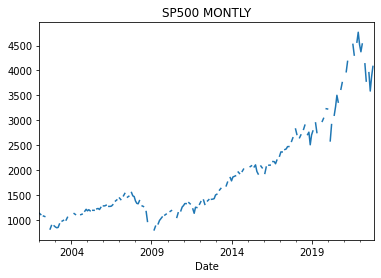

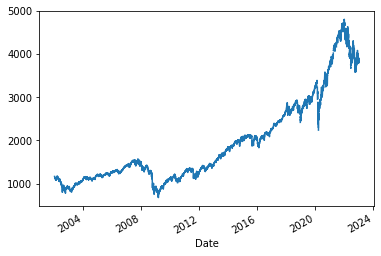

In [ ]:
import matplotlib.pyplot as plt
df.asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('SP500 MONTLY')
plt.show()
df[df.index>datetime.datetime(2000,12,31)].plot()

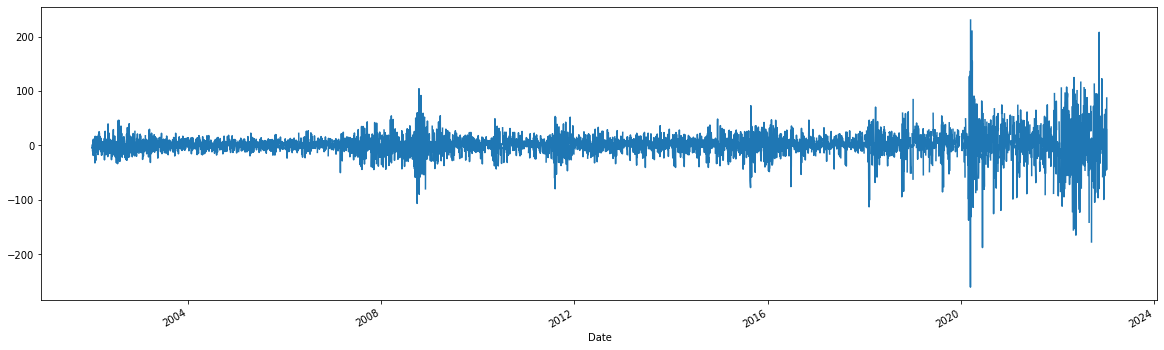

In [ ]:
DF = pd.DataFrame(df)
DF.PX_LAST.diff().plot(figsize=(20,6))

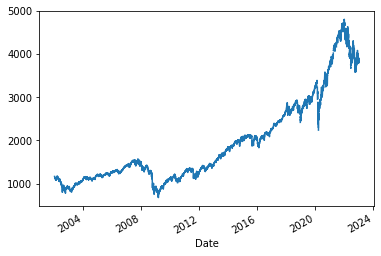

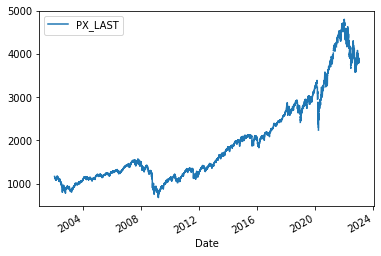

In [ ]:
rolling_DF = DF.PX_LAST.rolling('90D').mean()
DF.PX_LAST.plot()
DF.plot()
plt.legend(['PX_LAST','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

# Single Table Way

In [ ]:
#here we download in a different way:
#we append sequentially all the data marked by the corresponding ticker and category
#in an unique DataFrame: DF_All_Quotes
#with this approach there aren't null (NaN) values because each ticker has is full range of dates
PERIOD = 'max'
DF_All_Quotes = pd.DataFrame()
for key, value in DictData.items():
   tickers = list(value['Symbol'])
   for ticker in tickers:
        quotes = yf.download(ticker, period=PERIOD, interval = INTERVAL, auto_adjust = True, progress = False)
        quotes.insert(0,'TICKER', ticker)
        quotes.insert(0,'Type', key)
        DF_All_Quotes=DF_All_Quotes.append(quotes)



1 Failed download:
- AVLR: No timezone found, symbol may be delisted


In [ ]:
DF_All_Quotes.drop(['Adj Close'], axis = 1, inplace = True) 

In [ ]:
#.csv export  
DF_All_Quotes.to_csv(R'DF_Yahoo_All_Quotes.csv')

In [ ]:
DF_All_Quotes.head(10)

,Type,TICKER,Open,High,Low,Close,Volume
Date,,,,,,,
1927-12-30,WORLD_INDICES,^GSPC,17.660000,17.660000,17.660000,17.660000,0.0
1928-01-03,WORLD_INDICES,^GSPC,17.760000,17.760000,17.760000,17.760000,0.0
1928-01-04,WORLD_INDICES,^GSPC,17.719999,17.719999,17.719999,17.719999,0.0
1928-01-05,WORLD_INDICES,^GSPC,17.549999,17.549999,17.549999,17.549999,0.0
1928-01-06,WORLD_INDICES,^GSPC,17.660000,17.660000,17.660000,17.660000,0.0
1928-01-09,WORLD_INDICES,^GSPC,17.500000,17.500000,17.500000,17.500000,0.0
1928-01-10,WORLD_INDICES,^GSPC,17.370001,17.370001,17.370001,17.370001,0.0
1928-01-11,WORLD_INDICES,^GSPC,17.350000,17.350000,17.350000,17.350000,0.0
1928-01-12,WORLD_INDICES,^GSPC,17.469999,17.469999,17.469999,17.469999,0.0


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
DF_All_Quotes.describe()

,Open,High,Low,Close,Volume
count,3350447.00,3350447.00,3350447.00,3351651.00,3351651.00
mean,635.80,641.97,629.69,635.77,148190085.59
std,4153.12,4200.93,4107.18,4153.89,62315609669.39
min,-0.11,-0.10,-0.23,-0.10,0.00
25%,7.13,7.40,7.18,7.27,21100.00
50%,22.87,23.14,22.76,22.95,583400.00
75%,47.94,48.48,47.82,48.15,6523000.00
max,209646.00,216279.70,209646.00,213794.30,83252070566791.00


In [ ]:
DF_All_Quotes[DF_All_Quotes==np.nan].count()

Type      0
TICKER    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
TickerType = "WORLD_INDICES"
DF_All_Quotes[DF_All_Quotes.Type == TickerType].head()

,Type,TICKER,Open,High,Low,Close,Volume
Date,,,,,,,
1927-12-30,WORLD_INDICES,^GSPC,17.66,17.66,17.66,17.66,0.00
1928-01-03,WORLD_INDICES,^GSPC,17.76,17.76,17.76,17.76,0.00
1928-01-04,WORLD_INDICES,^GSPC,17.72,17.72,17.72,17.72,0.00
1928-01-05,WORLD_INDICES,^GSPC,17.55,17.55,17.55,17.55,0.00
1928-01-06,WORLD_INDICES,^GSPC,17.66,17.66,17.66,17.66,0.00


In [ ]:
#Selected ticker 
INDICES_TICKER_LIST = DF_All_Quotes[DF_All_Quotes.Type == TickerType]['TICKER'].unique()
pd.DataFrame(INDICES_TICKER_LIST)

,0
0,^GSPC
1,^DJI
2,^IXIC
3,^NYA
4,^XAX
5,^RUT
6,^VIX
7,^FTSE
8,^GDAXI
9,^FCHI


In [ ]:
#Columns names 
DF_All_Quotes[DF_All_Quotes.Type == TickerType].columns

Index(['Type', 'TICKER', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

# Intraday Data

In [ ]:
All_Quotes_intraday = pd.DataFrame()
for key, value in DictData.items():
   tickers = list(value['Symbol'])
   for ticker in tickers:
        quotes = yf.download(ticker, period='5d', interval = '1m', auto_adjust = True, progress = False)
        quotes.insert(0,'TICKER', ticker)
        quotes.insert(0,'Type', key)
        All_Quotes_intraday=All_Quotes_intraday.append(quotes)     

In [ ]:
All_Quotes_intraday.drop(columns = ['Adj Close'], axis = 1, inplace = True)
All_Quotes_intraday.to_csv(R'Yahoo_All_Quotes_intraday.csv')
All_Quotes_intraday.describe()

,Open,High,Low,Close,Volume
count,1908528.00,1908528.00,1908528.00,1908528.00,1908528.00
mean,661.22,661.31,661.13,661.22,168417.99
std,4786.28,4787.05,4785.51,4786.28,5450345.60
min,0.00,0.00,0.00,0.00,0.00
25%,0.64,0.64,0.64,0.64,0.00
50%,10.25,10.25,10.25,10.25,801.00
75%,49.24,49.26,49.23,49.24,9138.00
max,109733.88,109733.88,109733.88,109733.88,3387055594.00
